In [39]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=column_names)

In [41]:
# Passo 2: Calcular estatísticas descritivas
# Média, desvio padrão e moda de cada variável em geral
print("Estatísticas gerais:")
print(df.describe())

Estatísticas gerais:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [42]:
# Média, desvio padrão e moda de cada variável por categoria
print("\nEstatísticas por categoria:")
print(df.groupby('class').describe())


Estatísticas por categoria:
                sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                 

In [43]:
print(df.head())
print(df.columns)

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


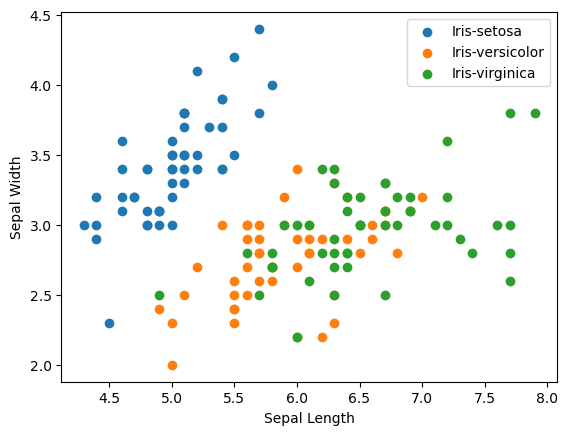

In [44]:
plt.scatter(df[df['class'] == 'Iris-setosa']['sepal_length'], df[df['class'] == 'Iris-setosa']['sepal_width'], label='Iris-setosa')
plt.scatter(df[df['class'] == 'Iris-versicolor']['sepal_length'], df[df['class'] == 'Iris-versicolor']['sepal_width'], label='Iris-versicolor')
plt.scatter(df[df['class'] == 'Iris-virginica']['sepal_length'], df[df['class'] == 'Iris-virginica']['sepal_width'], label='Iris-virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

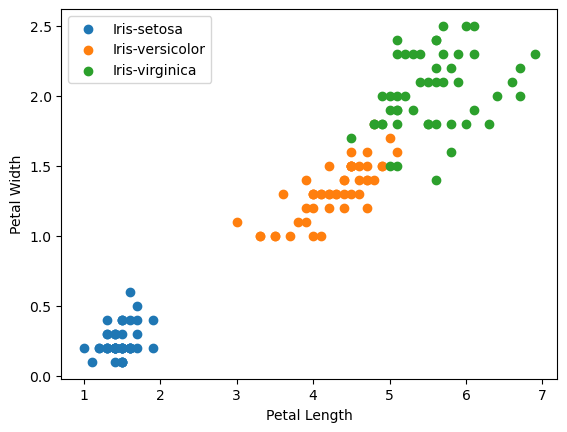

In [45]:
plt.scatter(df[df['class'] == 'Iris-setosa']['petal_length'], df[df['class'] == 'Iris-setosa']['petal_width'], label='Iris-setosa')
plt.scatter(df[df['class'] == 'Iris-versicolor']['petal_length'], df[df['class'] == 'Iris-versicolor']['petal_width'], label='Iris-versicolor')
plt.scatter(df[df['class'] == 'Iris-virginica']['petal_length'], df[df['class'] == 'Iris-virginica']['petal_width'], label='Iris-virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

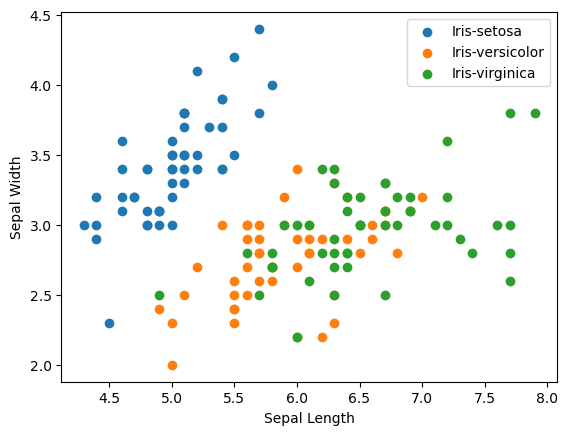

In [46]:
plt.scatter(df[df['class'] == 'Iris-setosa']['sepal_length'], df[df['class'] == 'Iris-setosa']['sepal_width'], label='Iris-setosa')
plt.scatter(df[df['class'] == 'Iris-versicolor']['sepal_length'], df[df['class'] == 'Iris-versicolor']['sepal_width'], label='Iris-versicolor')
plt.scatter(df[df['class'] == 'Iris-virginica']['sepal_length'], df[df['class'] == 'Iris-virginica']['sepal_width'], label='Iris-virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [47]:
df1 = df.loc[:, df.columns != "class"]
df1_target = df.loc[:, df.columns == "class"]

In [48]:
df1.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [49]:
df1.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [50]:
df1.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.5,0.2


In [51]:
df_class1 = df.loc[df["class"] == "Iris-setosa"]

In [52]:
df_class1

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
df_class1 = df_class1.loc[:, df_class1.columns != "class"]

In [20]:
df_class1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [21]:
df_class1.mean()

sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

In [22]:
df_class1.std()

sepal_length    0.352490
sepal_width     0.381024
petal_length    0.173511
petal_width     0.107210
dtype: float64

In [23]:
df_class1.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.4,1.5,0.2
1,5.1,NaN,NaN,NaN


In [24]:
df_class2 = df.loc[df["class"] == "Iris-versicolor"]

In [25]:
df_class2

,sepal_length,sepal_width,petal_length,petal_width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [26]:
df_class2 = df_class2.loc[:, df_class2.columns != "class"]

In [27]:
df_class2.std()

sepal_length    0.516171
sepal_width     0.313798
petal_length    0.469911
petal_width     0.197753
dtype: float64

In [28]:
df_class2.mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [29]:
df_class2.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,3.0,4.5,1.3
1,5.6,NaN,NaN,NaN
2,5.7,NaN,NaN,NaN


In [30]:
df_class3 = df.loc[df["class"] == "Iris-virginica"]

In [31]:
df_class3 = df_class3.loc[:, df_class3.columns != "class"]

In [32]:
df_class3.mean()

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

In [33]:
df_class3.std()

sepal_length    0.635880
sepal_width     0.322497
petal_length    0.551895
petal_width     0.274650
dtype: float64

In [34]:
df_class3.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,6.3,3.0,5.1,1.8


In [35]:
df.corr()

/var/folders/sb/8p3bk2257fjf7nc1knx9ysqw0000gn/T/ipykernel_53631/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [36]:

# Separar os dados de entrada (X) e os rótulos (y)
X = df1
y = df1_target


# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do classificador KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o classificador com os dados de treinamento
knn.fit(X_train, y_train.values.ravel())

# Prever os rótulos para os dados de teste
y_pred = knn.predict(X_test)
result = X_test
result["class_classified"] = y_pred
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 1.0


In [37]:
result

,sepal_length,sepal_width,petal_length,petal_width,class_classified
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
